<a href="https://colab.research.google.com/github/filipesartori/Inteligencia-Artificial/blob/main/Rede_Neural_Convolucional_Gato_e_Cachorro_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural Convolucional 

## Bibliotecas

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
tf.__version__

'2.6.0'

## Imagens 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Cópia de dataset_gato_cachorro.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

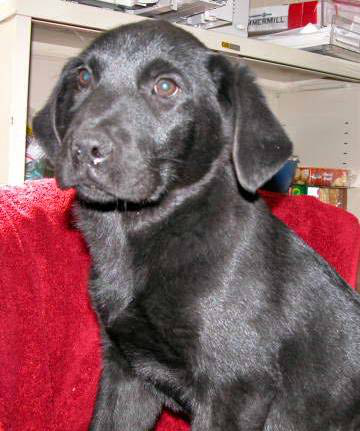

In [4]:
tf.keras.preprocessing.image.load_img(r'/content/dataset/test_set/cachorro/dog.3517.jpg')

## Base de dados

In [5]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip=True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
base_treinamento = gerador_treinamento.flow_from_directory('/content/dataset/training_set',
                                                           target_size= (64, 64),
                                                           batch_size = 32,
                                                           class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [6]:
gerador_teste = ImageDataGenerator(rescale = 1./2552)
base_teste = gerador_treinamento.flow_from_directory('/content/dataset/test_set',
                                                     target_size= (64, 64),
                                                     batch_size = 32,
                                                     class_mode = 'binary',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


## Rede neural

In [7]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (64, 64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 128, activation='relu'))
rede_neural.add(Dense(units = 128, activation='relu'))
rede_neural.add(Dense(units = 1, activation='sigmoid'))

In [8]:
rede_neural.compile(optimizer='adam', loss='binary_crossentropy',
                    metrics = ['accuracy'])

In [9]:
rede_neural.fit_generator(base_treinamento, epochs=10, validation_data=base_teste)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
125/125 [==============================] - 38s 293ms/step - loss: 0.6765 - accuracy: 0.5660 - val_loss: 0.6667 - val_accuracy: 0.5790
Epoch 2/10
125/125 [==============================] - 36s 289ms/step - loss: 0.6291 - accuracy: 0.6503 - val_loss: 0.6039 - val_accuracy: 0.6810
Epoch 3/10
125/125 [==============================] - 36s 289ms/step - loss: 0.5980 - accuracy: 0.6743 - val_loss: 0.5901 - val_accuracy: 0.6940
Epoch 4/10
125/125 [==============================] - 36s 287ms/step - loss: 0.5658 - accuracy: 0.7067 - val_loss: 0.6150 - val_accuracy: 0.6630
Epoch 5/10
125/125 [==============================] - 36s 289ms/step - loss: 0.5453 - accuracy: 0.7212 - val_loss: 0.5830 - val_accuracy: 0.7260
Epoch 6/10
125/125 [==============================] - 36s 288ms/step - loss: 0.5268 - accuracy: 0.7355 - val_loss: 0.5927 - val_accuracy: 0.6830
Epoch 7/10
125/125 [==============================] - 36s 289ms/step - loss: 0.5087 - accuracy: 0.7437 - val_loss: 0.5345 - val_ac

## Avaliação

In [10]:
previsoes = rede_neural.predict(base_teste)
previsoes

array([[3.41933787e-01],
       [2.14774102e-01],
       [1.42906606e-02],
       [2.54411638e-01],
       [5.31885505e-01],
       [8.82229209e-01],
       [4.04114872e-01],
       [5.34259796e-01],
       [1.31290585e-01],
       [7.53539503e-02],
       [4.11499143e-01],
       [1.59946144e-01],
       [7.55090415e-01],
       [4.03251946e-01],
       [2.56059647e-01],
       [3.88610810e-01],
       [1.48133814e-01],
       [4.56133336e-01],
       [8.48192573e-02],
       [1.91956460e-01],
       [3.23196828e-01],
       [2.66097844e-01],
       [7.04586029e-01],
       [5.44896007e-01],
       [7.71276712e-01],
       [3.00704598e-01],
       [3.38279307e-01],
       [4.31562662e-02],
       [1.00898445e-02],
       [1.23614192e-01],
       [4.35025632e-01],
       [9.15614009e-01],
       [4.25610542e-01],
       [2.54332781e-01],
       [3.93661797e-01],
       [1.72010243e-01],
       [8.32163095e-01],
       [2.84599513e-01],
       [2.44423449e-02],
       [3.86310071e-01],


In [11]:
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [13]:
base_teste.class_indices

{'cachorro': 0, 'gato': 1}

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, base_teste.classes)

0.731

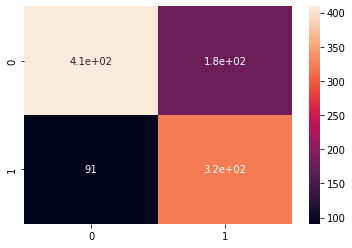

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(previsoes, base_teste.classes)
sns.heatmap(cm, annot=True)